# Day 1
## Pneumonia Use Case Part 1

In this notebook, we will put our newly developed Python skills to use. We will analyze a dataset of ICU patients from the MIMIC-II database.

1. Exploratory data analysis
2. Wrangle data
3. Calculate the relative risk (RR) of variables with 30-day mortality
4. Perform survival analysis to study the cumulative incidence of 30-day mortality and study the association of pneumonia with 30-day mortality

**Study population**: All patients in MIMIC-II who were discharged from the ICU and are at least 18 years old.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

## 0. Read in data

In [31]:
FILEPATH = "../data/pna_30_day_mortality.csv"

#### TODO
Read in the CSV file under `../data/pna_30_day_mortality.csv`

In [32]:
df = pd.read_csv(FILEPATH)

In [33]:
len(df)

5074

In [34]:
df.head()

,subject_id,hadm_id,disch_dt,dod,sex,ethnicity_descr,age_at_discharge,age_at_discharge_binned,pna,time_discharge_to_death,mortality_30_day
0,56,28766,2644-01-23 00:00:00,2644-01-23 00:00:00,F,WHITE,90.7205,91+,0,0,1
1,37,18052,3264-08-19 00:00:00,3265-12-31 00:00:00,M,WHITE,68.9863,66-90,1,499,0
2,78,15161,2778-03-27 00:00:00,2781-03-11 00:00:00,M,BLACK/AFRICAN AMERICAN,48.6658,36-65,0,1080,0
3,67,35878,2976-11-29 00:00:00,2976-11-29 00:00:00,M,WHITE,73.5397,66-90,0,0,1
4,3,2075,2682-09-18 00:00:00,2683-05-02 00:00:00,M,WHITE,76.6055,66-90,0,226,0


## 1. Exploratory data analysis

#### TODO
Our first analysis will be exploring the dataset using visualization and summary statistics. We will answer questions like:
- What are the demographics of the patient population?
- How many patients died in the hospital? How long did patients survive after discharge?
- How many patients had pneumonia? Does the subpopulation of pneumonia cases differ at all from the rest of the population?

But first, you may need to do some additional data transformations to get the necessary variables. Start by exploring the dataset and getting familiar with it. Which of the previous analyses can you do? Which do you need to do additional work for?

In [16]:
df.head()

,subject_id,hadm_id,disch_dt,dod,sex,ethnicity_descr,age_at_discharge,age_at_discharge_binned,pna,time_to_death,mortality_30_day
0,56,28766,2644-01-23 00:00:00,2644-01-23 00:00:00,F,WHITE,90.7205,91+,0,0,1
1,37,18052,3264-08-19 00:00:00,3265-12-31 00:00:00,M,WHITE,68.9863,66-90,1,499,0
2,78,15161,2778-03-27 00:00:00,2781-03-11 00:00:00,M,BLACK/AFRICAN AMERICAN,48.6658,36-65,0,1080,0
3,67,35878,2976-11-29 00:00:00,2976-11-29 00:00:00,M,WHITE,73.5397,66-90,0,0,1
4,3,2075,2682-09-18 00:00:00,2683-05-02 00:00:00,M,WHITE,76.6055,66-90,0,226,0


In [25]:
df["in_hospital_mortality"] = (df["disch_dt"] == df["dod"]).astype(int)

<AxesSubplot:>

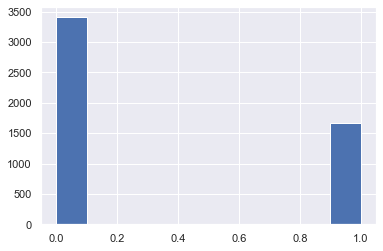

In [27]:
df["in_hospital_mortality"].hist()

<AxesSubplot:xlabel='count', ylabel='ethnicity_descr'>

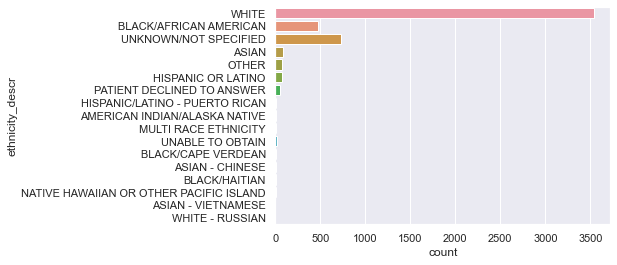

In [23]:
sns.countplot(y="ethnicity_descr", data=df)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age_at_discharge', ylabel='Density'>

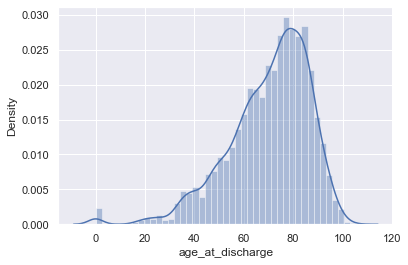

In [24]:
sns.distplot(df["age_at_discharge"])

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_at_discharge_binned', ylabel='count'>

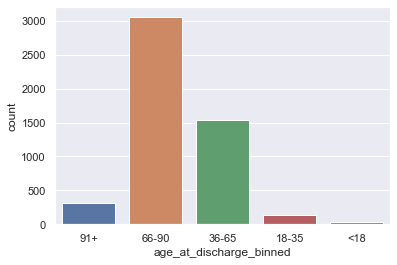

In [28]:
sns.countplot(df["age_at_discharge_binned"])

#### TODO
Add a column `"in_hospital_mortality"` which is 1 if the patient died while in the hospital and 0 otherwise.

*Hint:* How do you know whether they died in the hospital?

In [ ]:
df["in_hospital_mortality"] = (df["disch_dt"] == df["dod"]).astype(int)

#### TODO
Add a column to your dataframe called `binned_age_at_discharge` with the following levels:
- "<18"
- "18-35"
- "36-65"
- "66-90"
- "91+"

In [30]:
def bin_age_at_discharge(age):
    # todo
    pass

#### TODO
Add a column `mortality_30_day` indicating whether the patient died within 30 days of discharge.

In [36]:
df["mortality_30_day"] = (df["time_discharge_to_death"] <= 30).astype(int)

In [37]:
!pip install scikit-survival

     |████████████████████████████████| 754 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 8.0 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 654 kB/s eta 0:00:01
     |████████████████████████████████| 249 kB 745 kB/s eta 0:00:01
     |████████████████████████████████| 99 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 1.9 MB/s eta 0:00:01


#### TODO
Filter the dataset to only patients who did not die in the hospital.

In [ ]:
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(df["Status"], df["Survival_in_days"])